In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Load dataset and analyse the values

In [30]:
data = pd.read_csv('/content/car_age_price.csv')
data.head(10)

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000
6,2016,425000
7,2017,575000
8,2017,509999
9,2017,575000


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [32]:
#Checking null values
data.isna().sum()

Year     0
Price    0
dtype: int64

No missing values.

In [33]:
#Checking duplicate rows
print(data.duplicated().value_counts())#Fiding number of duplicate rows
data.groupby(data.columns.tolist(),as_index=False).size()#Finding count of each values



False    58
True     54
dtype: int64


,Year,Price,size
0,2013,320000,1
1,2013,325000,1
2,2013,345000,2
3,2014,300000,1
4,2014,341000,1
5,2014,390000,1
6,2014,400000,2
7,2014,450000,1
8,2015,300000,3
9,2015,320000,1


We observed 54 duplicate values in the dataset. Considering the small size of the dataset, we have decided to retain these duplicates as removing them could potentially affect the model's performance.



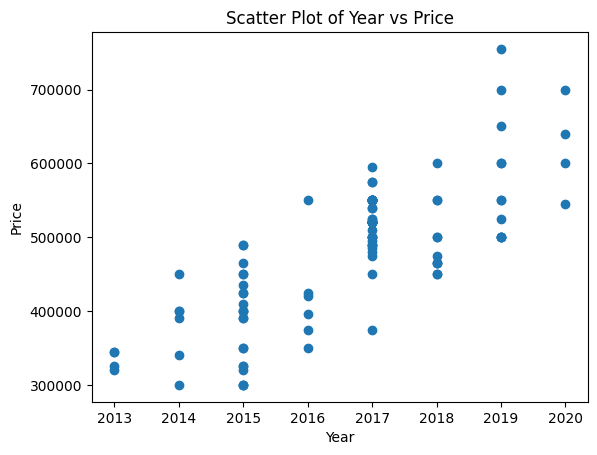

In [34]:
#Scatter plot for showing individual data points
plt.scatter(data['Year'],data['Price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Scatter Plot of Year vs Price')
plt.show()



Price increases with year, but 2020 we can see a slight drop in price compared to 2019.

Text(0.5, 1.0, 'Year')

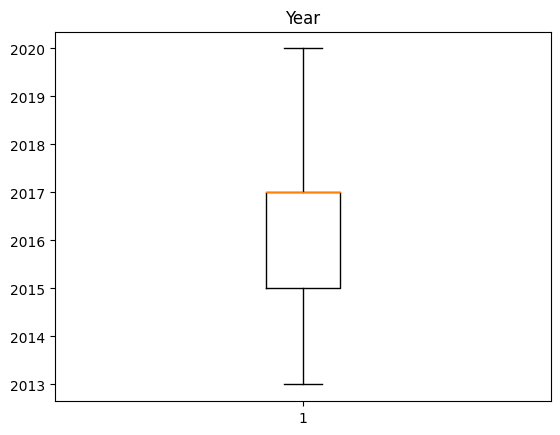

In [35]:
#Checking outliers
plt.figure()
plt.boxplot(data['Year'])
plt.title('Year')


No outliers in the year column.

Checking correlation

<Axes: >

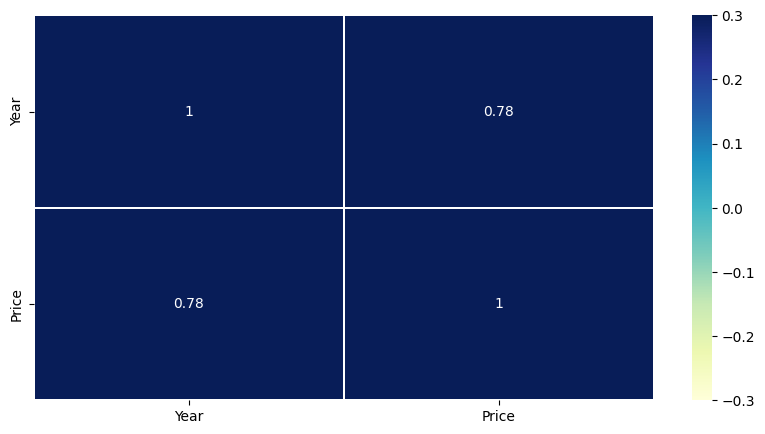

In [36]:
import seaborn as sns
corrmatrix= data.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(corrmatrix,vmin=-0.3,vmax=0.3,annot=True,linewidths=0.2,cmap='YlGnBu')

Map shows Price has high correlation with year

In [37]:
y = data['Price']  #Assign dependent variable
x= data.drop(['Price'],axis=1) #Independent variables

In [38]:
#Split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=.25)

In [39]:
#Making linear regression model
from sklearn import linear_model
lin_model = linear_model.LinearRegression()
model = lin_model.fit(x_train,y_train)

In [40]:
#Check the data with test data
predict_lin = model.predict(x_test)
predict_lin

array([599223.07304104, 505265.04214995, 552244.05759549, 552244.05759549,
       552244.05759549, 411307.01125886, 505265.04214995, 552244.05759549,
       599223.07304104, 599223.07304104, 317348.98036776, 505265.04214995,
       411307.01125886, 646202.08848657, 552244.05759549, 599223.07304104,
       317348.98036776, 411307.01125886, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 411307.01125886, 411307.01125886])

In [73]:
#Check the goodness of model using MSE .
from sklearn.metrics import mean_squared_error
linear_mse = mean_squared_error(y_test,predict_lin)
print('MSE is :',linear_mse)

MSE is : 3878767151.073449


MSE value is high value.So the model is not good

In [42]:
#Check the goodness of model using R2 score .
from sklearn.metrics import r2_score
print('R2 score is:',r2_score(y_test,predict_lin))

R2 score is: 0.4347961632108023


R2 score is also not good

#Predict the possible price of a 2022 model second-hand grand **i10**


In [43]:
predict_2022 = model.predict(np.array([[2022]]))
print("Predicted price of a 2022 model second-hand grand i10 is :",predict_2022[0])

Predicted price of a 2022 model second-hand grand i10 is : 740160.1193776578


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted price of a 2022 model second-hand grand i10 using Linear regression is : 740160.1193776578

#Let's check the impact of scaling in the performance of model.

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))



In [47]:
x_train_sc = scaler.fit_transform(x_train)
x_test_sc =  scaler.fit_transform(x_test)

In [75]:
model = lin_model.fit(x_train_sc,y_train)

In [76]:
predict_lin_sc = model.predict(x_test_sc)
predict_lin_sc

array([599223.07304101, 505265.04214993, 552244.05759548, 552244.05759548,
       552244.05759548, 411307.01125884, 505265.04214993, 552244.05759548,
       599223.07304101, 599223.07304101, 317348.98036775, 505265.04214993,
       411307.01125884, 646202.08848657, 552244.05759548, 599223.07304101,
       317348.98036775, 411307.01125884, 505265.04214993, 505265.04214993,
       505265.04214993, 505265.04214993, 505265.04214993, 505265.04214993,
       505265.04214993, 505265.04214993, 411307.01125884, 411307.01125884])

In [77]:
from sklearn.metrics import mean_squared_error
print('MSE After scaling is :',mean_squared_error(y_test,predict_lin_sc))

MSE After scaling is : 3878767151.072697


In [78]:
from sklearn.metrics import r2_score
print('R2 score is:',r2_score(y_test,predict_lin_sc))

R2 score is: 0.43479616321091186


Scaling has no effect.

#Lasso regression

In [70]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.2)
lassoReg.fit(x_train,y_train)
lasso_pred = lassoReg.predict(x_test)
lasso_mse = mean_squared_error(y_test,lasso_pred)
print('MSE is :',lasso_mse)
print('R2 score is:',r2_score(y_test,lasso_pred))


MSE is : 3878760900.02546
R2 score is: 0.434797074097218


MSE value and R2 score Lasso regression model is not in good range. Model performance is not satisfactory.

#Predict the possible price of a 2022 model second-hand grand **i10** using Lasso regression


In [72]:
lasso_pred_2022 = lassoReg.predict(np.array([[2022]]))

print("Predicted price of a 2022 model second-hand grand i10 is :",lasso_pred_2022[0])

Predicted price of a 2022 model second-hand grand i10 is : 740159.6869024187


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


Predicted price of a 2022 model second-hand grand i10 using Lasso regression is : 740159.6869024187

> Indented block



In [79]:
if linear_mse<lasso_mse:
  print("Linear regression model is good")
else:
  print("Lasso regression model is good")

Lasso regression model is good


Mse value of Linear regression is 3878767151.073449 and R2 score is: 0.4347961632108023. Mse value of Lasso regression is 3878760900.02546 and R2 score is 0.434797074097218. Predicted price of a 2022 model second-hand grand i10 using Linear regression model is : **740160.1193776578** and using Lasso regression model is **740159.6869024187** .


**Both models giving similar values.Only slight variations. According to MSE and R2 score Lasso regression is performing slightly better.**


**The overall performance of both models is not considered satisfactory.**